In [5]:
from collections import defaultdict
from matplotlib_venn import venn3
import dataloader
import itertools
from net.charrnn import CharRNN
import torch
from config import *
import numpy as np
import pandas as pd
from IPython.display import display
from visualize import visualize_cell, visualize_gate
%matplotlib inline

(trl, tel, val), vocab = dataloader.load(FILE_PATH, DEVICE, SPLITS, BATCH_SIZE, SEQ_LEN, unique=True)

In [6]:
net = CharRNN.load_from_file("rnn", 1, 32).eval()
for method in "rand", "max", "softrand":
    print(method, net.predict("Hello ", PREDICT_SEQ_LEN, vocab, method=method), sep="\t")


rand	Hello 5 )
LU)KDB3AASDOU=X8-B
)n3sNVK;kKw6cT8rOJ6:Xqx)R4MkTLQQ8SMO?LTTPbI6GCF
max	Hello and and and and and and and and and and and and and and and and and an
softrand	Hello hean darnow befor of face. Them intouf whatell how a--he his my goich 


In [ ]:
sets = {}
for params in [("rnn", 1, 32), ("gru", 1, 32), ("gru", 1, 128)]:
    net = CharRNN.load_from_file(*params).eval()

    val = set()
    offset = 0
    for x, y in tel:
        correct = net.forward(x).argmax(-1) == y.flatten()
        val |= {n + offset for n, b in enumerate(correct) if b}
        offset += len(y.flatten())
    sets[net.name()] = val
venn3(sets.values(), sets.keys());

'train'

NameError: name 'hidden_size' is not defined

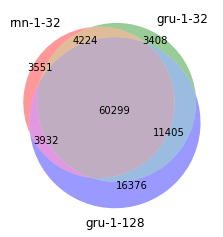

In [3]:
model_names = ["lstm", "rnn", "gru"]
n_layers = [1, 2, 3, 4]
hidden_sizes = [32, 64, 128, 256, 512, 1024]
corrects, losses = [], []

for loader, loadername in (trl, "train"), (tel, "tel"):
    display(loadername)
    for MODEL_NAME in model_names:
        for N_LAYERS in n_layers:
            for HIDDEN_SIZE in hidden_sizes:
                net = CharRNN.load_from_file(MODEL_NAME, N_LAYERS, HIDDEN_SIZE).eval()
                correct, loss = [], []
                for x, y in loader:
                    out = net.forward(x)
                    correct += (out.argmax(-1) == y.flatten()).tolist()
                    loss += [(torch.nn.functional.cross_entropy(out, y.flatten())).tolist()]
                corrects.append(np.mean(correct))
                losses.append(np.mean(loss))

    for title, arr in (("accuracy", corrects), ("loss", losses)):
        arr = np.array(arr).reshape((len(hidden_sizes), len(model_names) * len(n_layers)))
        columns = pd.MultiIndex.from_product([model_names, n_layers])
        df = pd.DataFrame(arr, columns=columns, index=hidden_size)
        df.columns.name = title
        display(df.round(3))

/usr/lib/python3.8/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'extractable.LSTMx' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


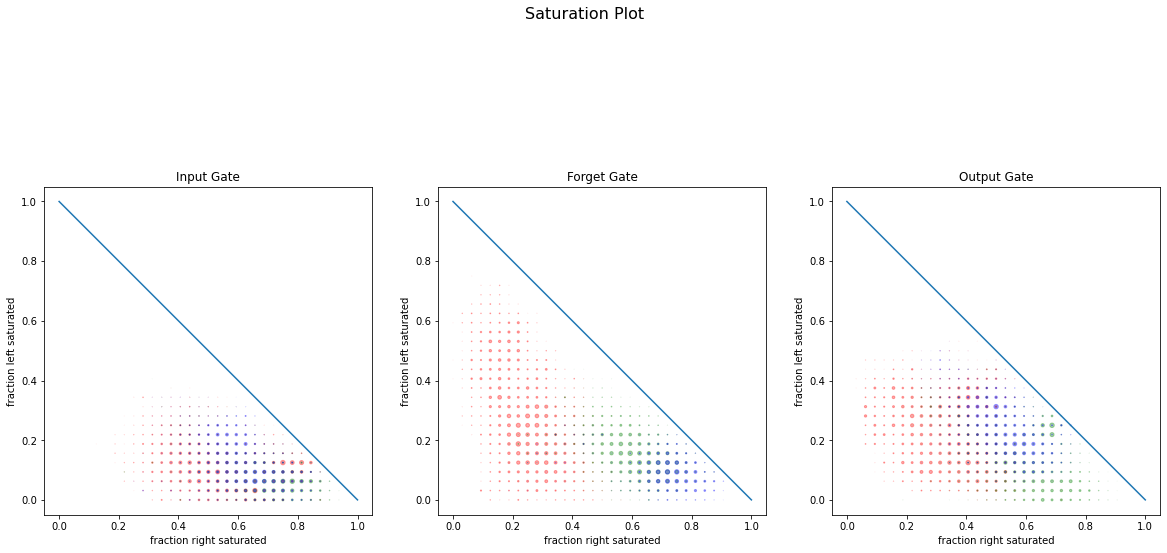

In [5]:
net = CharRNN.load_from_file("lstm", N_LAYERS, HIDDEN_SIZE).eval()
input_gates, forget_gates, cell_gates, output_gates, cell_states = net.extract_from_loader(tel)
visgate(input_gates, forget_gates, output_gates)

In [4]:
net = CharRNN.load_from_file("gru", N_LAYERS, HIDDEN_SIZE).eval()
forget_gates, update_gates = net.extract_from_loader(tel)
visgate(reset_gates, update_gates)

/usr/lib/python3.8/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'net.CharRNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/lib/python3.8/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'extractable.GRUx' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


ValueError: axes don't match array